In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv("data/TE1_02_F1_training.csv", sep = "|", low_memory=False)
print(len(train))
train.head(3)

75526


,timestamp,G_CONS,G_ALAM,G_TLNO,G_PRGM,G_PRGR,G_SPMS,G_CMDF,G_EXEP,G_TOFS_WEAR_H_0,...,G_PMCY_F0064_4,G_PMCY_F0064_5,G_PMCY_F0064_6,G_PMCY_F0064_7,G_CUTT,G_OPRT,G_ACTS,G_ACTF,G_MPCH,idle_code
0,20190917100000544617,12,-1,2,O0001,O0001,1300,0,O0001(10206-0271081-C),"0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0...",...,0,0,0,0,61358030848,5813229712,0,0,0,C3
1,20190917100004647156,12,-1,2,O0001,O0001,1300,0,O0001(10206-0271081-C),"0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0...",...,0,0,0,0,61358030848,5813229712,0,0,0,C3
2,20190917100008761414,12,-1,2,O0001,O0001,1300,0,O0001(10206-0271081-C),"0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0...",...,0,0,0,0,61358030848,5813229712,0,0,0,C3


In [3]:
test = pd.read_csv("data/TE1_02_F1_testing.csv", sep = "|")
print(len(test))
test.head(3)

4846


,timestamp,G_CONS,G_ALAM,G_TLNO,G_PRGM,G_PRGR,G_SPMS,G_CMDF,G_EXEP,G_TOFS_WEAR_H_0,...,G_PMCY_F0064_4,G_PMCY_F0064_5,G_PMCY_F0064_6,G_PMCY_F0064_7,G_CUTT,G_OPRT,G_ACTS,G_ACTF,G_MPCH,idle_code
0,20191111083001759000,12,-1,3,O0001,O0000,3000,0,O0000%,"0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...",...,0,0,0,0,62567242784,7313205728,3000,0,0,M3
1,20191111083005855000,12,-1,3,O0001,O0000,3000,0,O0000%,"0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...",...,0,0,0,0,62567242784,7313205728,3001,0,0,M3
2,20191111083009951000,12,-1,3,O0001,O0000,3000,0,O0000%,"0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...",...,0,0,0,0,62567242784,7313205728,3000,0,0,M3


### Insight

In [4]:
train_count = train["idle_code"].value_counts()
train_count = pd.DataFrame(train_count).reset_index()

test_count = test["idle_code"].value_counts()
test_count = pd.DataFrame(test_count).reset_index()

In [5]:
counts = train_count.merge(test_count, on = "index", how = "left")
counts = counts.fillna(0)
counts

,index,idle_code_x,idle_code_y
0,M3,26410,3128.0
1,C3,11206,214.0
2,C5,8582,0.0
3,C6,7941,1050.0
4,C7,7526,0.0
5,M4,6638,0.0
6,M2,1946,0.0
7,C8,1884,0.0
8,C4,1758,0.0
9,C2,1389,0.0


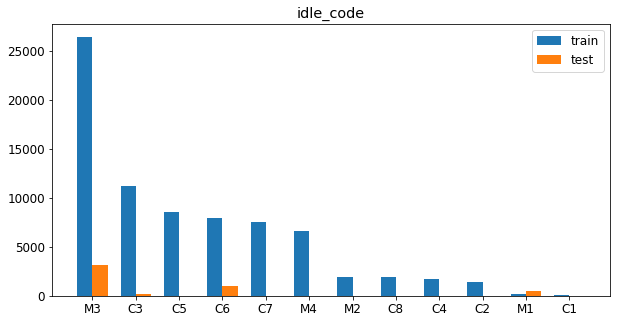

In [6]:
plt.figure(figsize=(10, 5))
x = np.arange(len(train_count))
width = 0.35
plt.rcParams['font.size'] = '12'
plt.bar(x, height = counts["idle_code_x"], width = width, label='train')
plt.bar(x + width,  height = counts["idle_code_y"], width = width, label='test')
plt.xticks(x + width / 2, counts["index"])
plt.legend(loc="upper right")
plt.title("idle_code")
plt.show()

### Concat train、test & Split X、Y

In [7]:
df = pd.concat([train, test], ignore_index = True)
print(len(df))

80372


In [8]:
y = pd.Series(df["idle_code"])
df = df.drop(["idle_code"], axis = 1)

### Handle timestamp

In [9]:
df["timestamp"] = df["timestamp"].apply(lambda X: X[:-6] )
df["timestamp"] = pd.to_datetime(df["timestamp"], format = "%Y%m%d%H%M%S")
df.head(3)

,timestamp,G_CONS,G_ALAM,G_TLNO,G_PRGM,G_PRGR,G_SPMS,G_CMDF,G_EXEP,G_TOFS_WEAR_H_0,...,G_PMCY_F0064_3,G_PMCY_F0064_4,G_PMCY_F0064_5,G_PMCY_F0064_6,G_PMCY_F0064_7,G_CUTT,G_OPRT,G_ACTS,G_ACTF,G_MPCH
0,2019-09-17 10:00:00,12,-1,2,O0001,O0001,1300,0,O0001(10206-0271081-C),"0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0...",...,0,0,0,0,0,61358030848,5813229712,0,0,0
1,2019-09-17 10:00:04,12,-1,2,O0001,O0001,1300,0,O0001(10206-0271081-C),"0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0...",...,0,0,0,0,0,61358030848,5813229712,0,0,0
2,2019-09-17 10:00:08,12,-1,2,O0001,O0001,1300,0,O0001(10206-0271081-C),"0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0...",...,0,0,0,0,0,61358030848,5813229712,0,0,0


In [10]:
df["week"] = df["timestamp"].apply(lambda X: X.weekday())
df["hour"] = df["timestamp"].apply(lambda X: X.hour)

In [11]:
df = df.drop(["timestamp"], axis = 1)

### Missing Value

In [12]:
df[df.isnull().any(axis = 1)]

,G_CONS,G_ALAM,G_TLNO,G_PRGM,G_PRGR,G_SPMS,G_CMDF,G_EXEP,G_TOFS_WEAR_H_0,G_TOFS_WEAR_D_1,...,G_PMCY_F0064_5,G_PMCY_F0064_6,G_PMCY_F0064_7,G_CUTT,G_OPRT,G_ACTS,G_ACTF,G_MPCH,week,hour


### Label encoding

In [13]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
y = labelencoder.fit_transform(y)

In [14]:
pd.DataFrame(y).value_counts()

10    29538
2     11420
5      8991
4      8582
6      7526
11     6638
9      1946
7      1884
3      1758
1      1389
8       632
0        68
dtype: int64

### One hot encoding

In [17]:
df.dtypes

G_CONS     int64
G_ALAM     int64
G_TLNO     int64
G_PRGM    object
G_PRGR    object
           ...  
G_ACTS     int64
G_ACTF     int64
G_MPCH    object
week       int64
hour       int64
Length: 510, dtype: object

In [15]:
category = list(df.dtypes[df.dtypes == object].index)
category

['G_PRGM',
 'G_PRGR',
 'G_EXEP',
 'G_TOFS_WEAR_H_0',
 'G_TOFS_WEAR_D_1',
 'G_TOFS_GEOM_H_2',
 'G_TOFS_GEOM_D_3',
 'G_MPCH']

In [16]:
one_hot = pd.get_dummies(df[category])
df = df.drop(category, axis = 1)
df = df.join(one_hot)
df.head(3)
df

,G_CONS,G_ALAM,G_TLNO,G_SPMS,G_CMDF,G_SPMC,G_SRMC_0,G_SRMC_1,G_SRMC_2,G_SRMC_3,...,"G_TOFS_GEOM_D_3_0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.02,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0","G_TOFS_GEOM_D_3_0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.038,0,0,0,0,0,0,0,0","G_TOFS_GEOM_D_3_0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0","G_TOFS_GEOM_D_3_0,0,0,0,0,0,0,0,0,0,0,0,0,0.04,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0",G_MPCH_0,G_MPCH_0,G_MPCH_44AC1679,G_MPCH_5B6DEA18,G_MPCH_837301B4,G_MPCH_C4E1E2DD
0,12,-1,2,1300,0,0,2,5,24,0,...,0,0,0,0,0,1,0,0,0,0
1,12,-1,2,1300,0,0,3,4,23,0,...,0,0,0,0,0,1,0,0,0,0
2,12,-1,2,1300,0,0,2,5,24,0,...,0,0,0,0,0,1,0,0,0,0
3,12,-1,2,1300,0,0,2,5,24,0,...,0,0,0,0,0,1,0,0,0,0
4,12,-1,2,1300,0,0,3,4,23,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80367,12,-1,2,2546,0,0,3,8,53,0,...,0,0,1,0,1,0,0,0,0,0
80368,12,-1,2,2546,0,0,2,8,53,0,...,0,0,1,0,1,0,0,0,0,0
80369,12,-1,2,2546,0,0,3,8,52,0,...,0,0,1,0,1,0,0,0,0,0
80370,12,-1,2,2546,0,0,2,8,53,0,...,0,0,1,0,1,0,0,0,0,0


In [17]:
df.dtypes[df.dtypes == object]

Series([], dtype: object)

### Constant feature

In [18]:
from sklearn.feature_selection import VarianceThreshold

var_threshold  = VarianceThreshold(threshold=0)
var_threshold.fit(df)

VarianceThreshold(threshold=0)

In [19]:
constant = [x for x in df.columns if x not in df.columns[var_threshold.get_support()]]
df = df.drop(constant, axis = 1)
df.head(3)

,G_CONS,G_ALAM,G_TLNO,G_SPMS,G_CMDF,G_SPMC,G_SRMC_0,G_SRMC_1,G_SRMC_2,G_SPSO,...,"G_TOFS_GEOM_D_3_0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.02,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0","G_TOFS_GEOM_D_3_0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.038,0,0,0,0,0,0,0,0","G_TOFS_GEOM_D_3_0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0","G_TOFS_GEOM_D_3_0,0,0,0,0,0,0,0,0,0,0,0,0,0.04,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0",G_MPCH_0,G_MPCH_0,G_MPCH_44AC1679,G_MPCH_5B6DEA18,G_MPCH_837301B4,G_MPCH_C4E1E2DD
0,12,-1,2,1300,0,0,2,5,24,100,...,0,0,0,0,0,1,0,0,0,0
1,12,-1,2,1300,0,0,3,4,23,100,...,0,0,0,0,0,1,0,0,0,0
2,12,-1,2,1300,0,0,2,5,24,100,...,0,0,0,0,0,1,0,0,0,0


### Qusi-constant feature

In [20]:
from sklearn.feature_selection import VarianceThreshold

var_threshold  = VarianceThreshold(threshold=0.99)
var_threshold.fit(df)

quasi_constant = [x for x in df.columns if x not in df.columns[var_threshold.get_support()]]
df = df.drop(quasi_constant, axis = 1)
df.head(3)

,G_ALAM,G_TLNO,G_SPMS,G_CMDF,G_SRMC_0,G_SRMC_1,G_SRMC_2,G_FERP,G_MLST_0,G_MLST_1,...,G_POSD_1,G_POSD_2,G_AUMO,G_TOCP,G_CUTT,G_OPRT,G_ACTS,G_ACTF,week,hour
0,-1,2,1300,0,2,5,24,100,-1,-1,...,0.0,0.0,1,47855,61358030848,5813229712,0,0,1,10
1,-1,2,1300,0,3,4,23,100,-1,-1,...,0.0,0.0,1,47855,61358030848,5813229712,0,0,1,10
2,-1,2,1300,0,2,5,24,100,-1,-1,...,0.0,0.0,1,47855,61358030848,5813229712,0,0,1,10


### Delete unimportant feature

In [21]:
df = df.drop(["G_CUTT", "G_OPRT", "G_TLNO", "G_TOCP"], axis = 1)

### 刪除train、test分布不同的feature

In [22]:
x_train = df[:75526]
x_test = df[75526:]

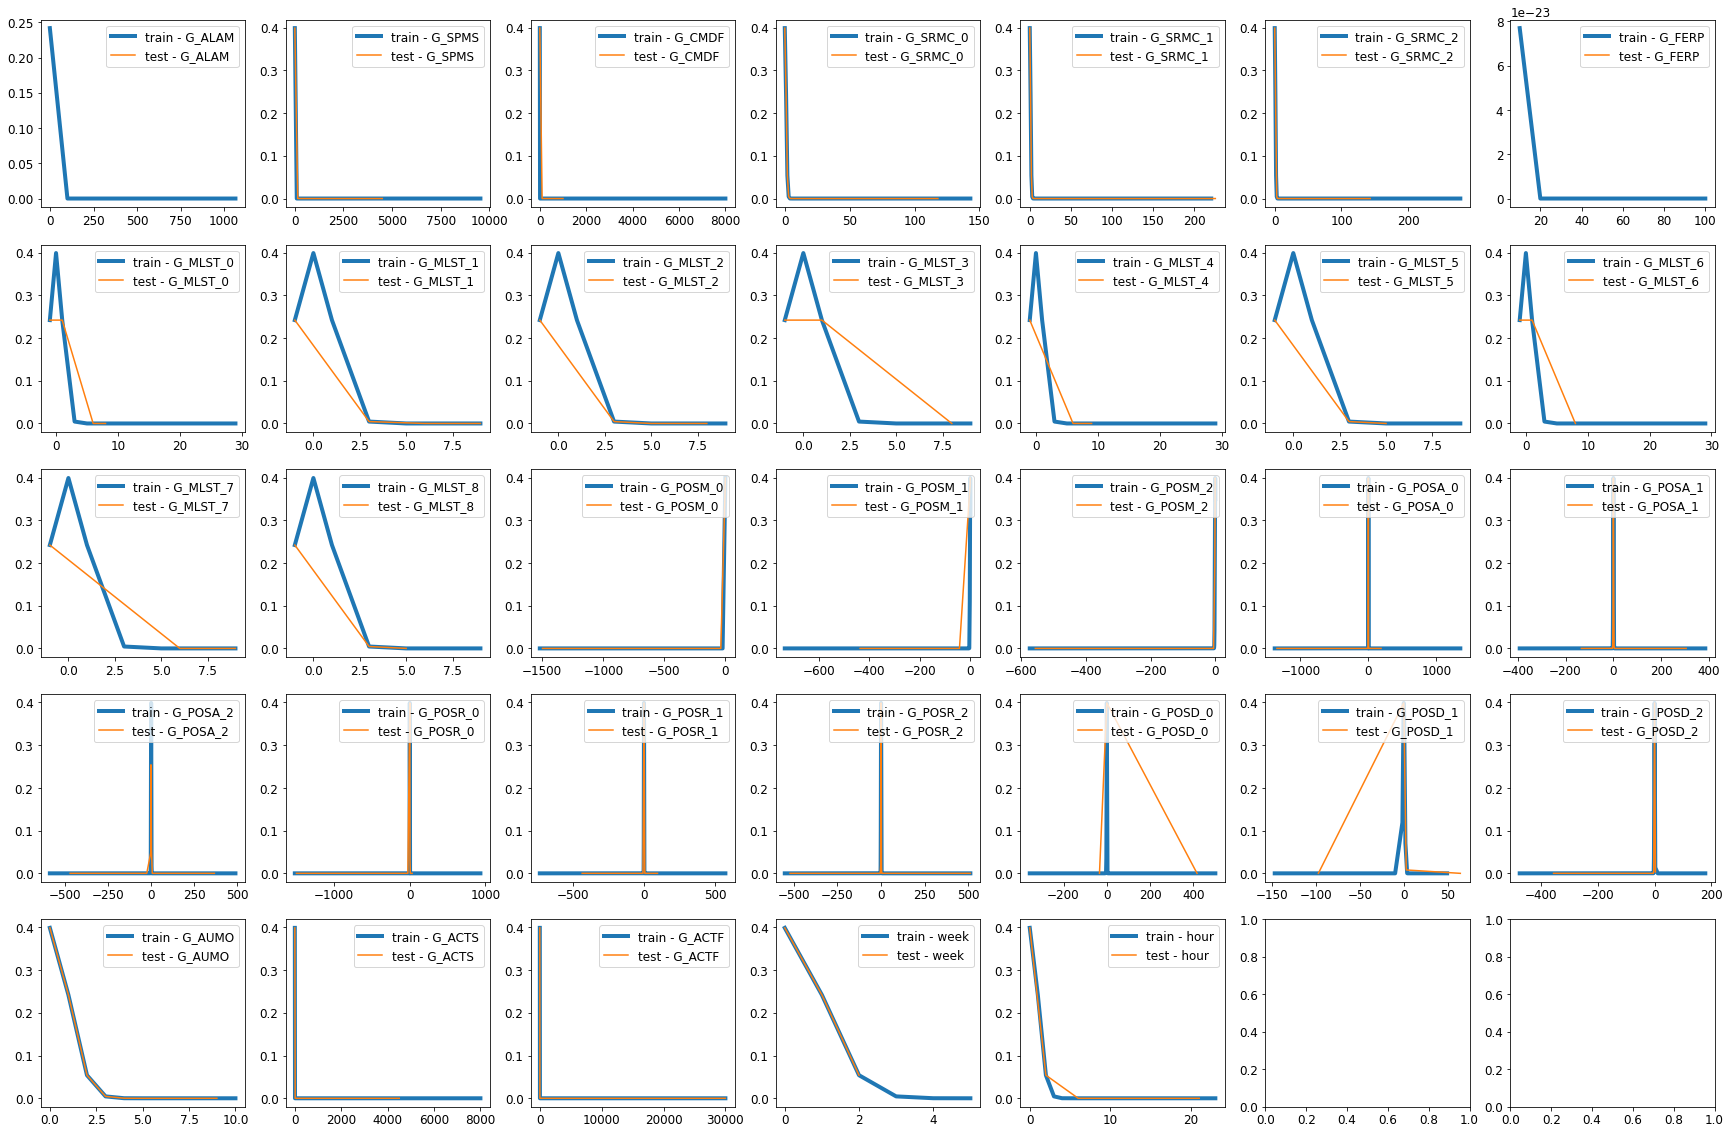

In [23]:
from scipy import stats

fig, ax = plt.subplots(5, 7, figsize=(30, 20))
for i in range(5):
    for j in range(7):
        k = 7 * i + j
        x = sorted(x_train[x_train.columns[k]])
        x1 = stats.norm.pdf(x)
        ax[i, j].plot(x, x1, label = f"train - {x_train.columns[k]}", linewidth = 4)

        x = sorted(x_test[x_test.columns[k]])
        x1 = stats.norm.pdf(x)
        ax[i, j].plot(x, x1, label = f"test - {x_train.columns[k]}")
        ax[i, j].legend(loc='upper right')
        if k+1 == len(x_train.columns):
            break

In [24]:
df = df.drop(["G_ALAM", "G_FERP", "G_MLST_0", "G_MLST_1", "G_MLST_2", "G_MLST_3", "G_MLST_4", "G_MLST_5", "G_MLST_6", "G_MLST_7", "G_MLST_8", "G_POSD_0", "G_POSD_1"], axis = 1)
df.head(3)

,G_SPMS,G_CMDF,G_SRMC_0,G_SRMC_1,G_SRMC_2,G_POSM_0,G_POSM_1,G_POSM_2,G_POSA_0,G_POSA_1,G_POSA_2,G_POSR_0,G_POSR_1,G_POSR_2,G_POSD_2,G_AUMO,G_ACTS,G_ACTF,week,hour
0,1300,0,2,5,24,-564.8835,0.0,0.0,44.037,174.0075,0.349,107.1328,123.1007,321.5227,0.0,1,0,0,1,10
1,1300,0,3,4,23,-564.8835,0.0,0.0,44.037,174.0075,0.349,107.1328,123.1007,321.5227,0.0,1,0,0,1,10
2,1300,0,2,5,24,-564.8835,0.0,0.0,44.037,174.0075,0.349,107.1328,123.1007,321.5227,0.0,1,0,0,1,10


## Heat map

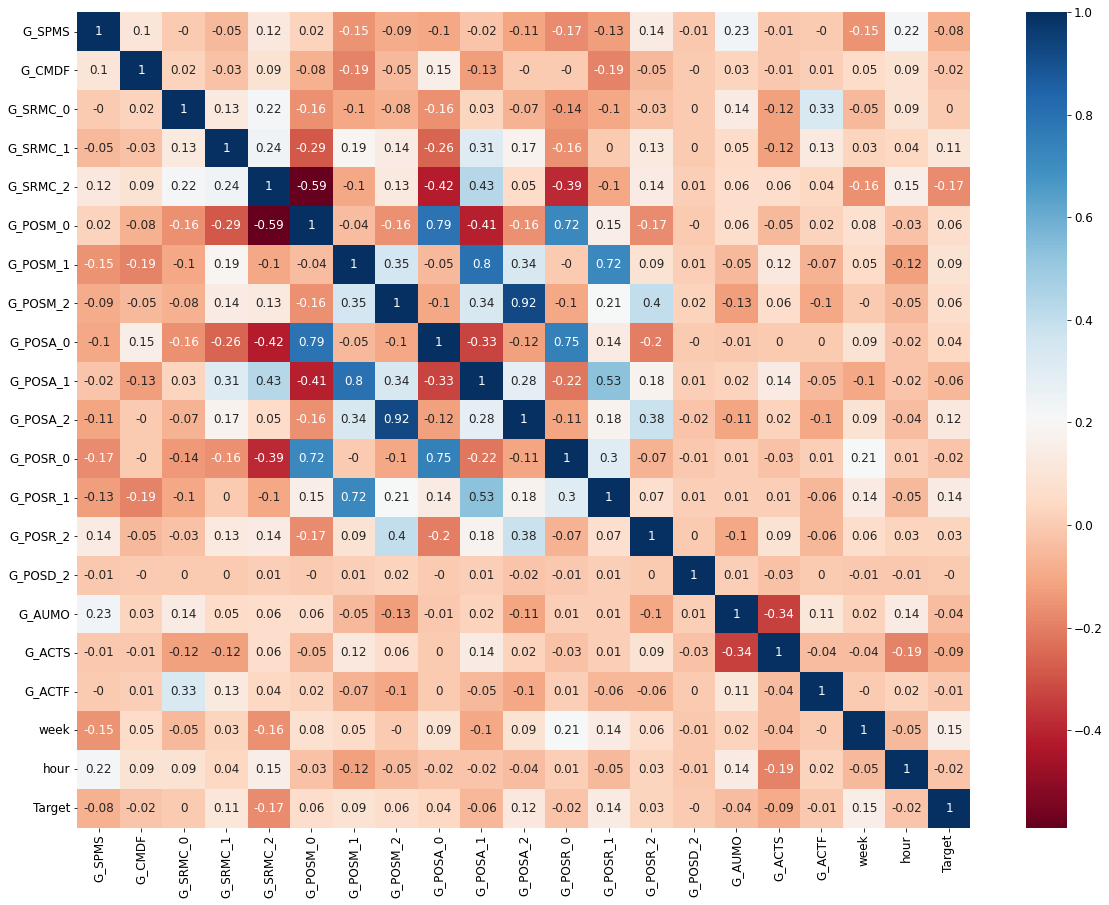

In [25]:
df1 = df[:75526].copy()
df1["Target"] = y[:75526]

plt.figure(figsize=(20, 15))
sns.heatmap(data = round(df1.corr(), 2), annot=True, cmap = 'RdBu')
plt.show()

### Feature Generation

In [26]:
# 座標xyz轉換為歐式距離
G_POSM = df[["G_POSM_0", "G_POSM_1", "G_POSM_2"]].values
df["G_POSM"] = [np.linalg.norm(i) for i in G_POSM]

G_POSA = df[["G_POSA_0", "G_POSA_1", "G_POSA_2"]].values
df["G_POSA"] = [np.linalg.norm(i) for i in G_POSA]

G_POSR = df[["G_POSR_0", "G_POSR_1", "G_POSR_2"]].values
df["G_POSR"] = [np.linalg.norm(i) for i in G_POSR]

G_SRMC = df[["G_SRMC_0", "G_SRMC_1", "G_SRMC_2"]].values
df["G_SRMC"] = [np.linalg.norm(i) for i in G_SRMC]
df.head(3)

,G_SPMS,G_CMDF,G_SRMC_0,G_SRMC_1,G_SRMC_2,G_POSM_0,G_POSM_1,G_POSM_2,G_POSA_0,G_POSA_1,...,G_POSD_2,G_AUMO,G_ACTS,G_ACTF,week,hour,G_POSM,G_POSA,G_POSR,G_SRMC
0,1300,0,2,5,24,-564.8835,0.0,0.0,44.037,174.0075,...,0.0,1,0,0,1,10,564.8835,179.493702,360.566313,24.596748
1,1300,0,3,4,23,-564.8835,0.0,0.0,44.037,174.0075,...,0.0,1,0,0,1,10,564.8835,179.493702,360.566313,23.537205
2,1300,0,2,5,24,-564.8835,0.0,0.0,44.037,174.0075,...,0.0,1,0,0,1,10,564.8835,179.493702,360.566313,24.596748


In [27]:
# 命令 > 實際
df["SPMS_ACTS"] = (df["G_SPMS"] > df["G_ACTS"]).astype(int)
df["CMDF_ACTF"] = (df["G_CMDF"] > df["G_ACTF"]).astype(int)
df.head(3)

,G_SPMS,G_CMDF,G_SRMC_0,G_SRMC_1,G_SRMC_2,G_POSM_0,G_POSM_1,G_POSM_2,G_POSA_0,G_POSA_1,...,G_ACTS,G_ACTF,week,hour,G_POSM,G_POSA,G_POSR,G_SRMC,SPMS_ACTS,CMDF_ACTF
0,1300,0,2,5,24,-564.8835,0.0,0.0,44.037,174.0075,...,0,0,1,10,564.8835,179.493702,360.566313,24.596748,1,0
1,1300,0,3,4,23,-564.8835,0.0,0.0,44.037,174.0075,...,0,0,1,10,564.8835,179.493702,360.566313,23.537205,1,0
2,1300,0,2,5,24,-564.8835,0.0,0.0,44.037,174.0075,...,0,0,1,10,564.8835,179.493702,360.566313,24.596748,1,0


In [28]:
df.drop(["G_POSM_0", "G_POSM_1", "G_POSM_2", "G_POSA_0", "G_POSA_1", "G_POSA_2", "G_POSR_0", "G_POSR_1", "G_POSR_2", "G_SRMC_0", "G_SRMC_1", "G_SRMC_2"], axis = 1, inplace = True)
df.head(3)

,G_SPMS,G_CMDF,G_POSD_2,G_AUMO,G_ACTS,G_ACTF,week,hour,G_POSM,G_POSA,G_POSR,G_SRMC,SPMS_ACTS,CMDF_ACTF
0,1300,0,0.0,1,0,0,1,10,564.8835,179.493702,360.566313,24.596748,1,0
1,1300,0,0.0,1,0,0,1,10,564.8835,179.493702,360.566313,23.537205,1,0
2,1300,0,0.0,1,0,0,1,10,564.8835,179.493702,360.566313,24.596748,1,0


### Modeling

#### Method 1

In [29]:
split = 75526
x_train = df[:split]
x_test = df[split:]
y_train = y[:split]
y_test = y[split:]

In [30]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state = 99, class_weight = 'balanced') # for imbalance data
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)

print("Accuracy")
print('train: ', round(rf.score(x_train, y_train), 4))
print('test: ', round(rf.score(x_test, y_test), 4))

Accuracy
train:  0.9811
test:  0.7235


In [31]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit


cv = ShuffleSplit(n_splits = 5, test_size=0.3, random_state = 9)
cross_val_score(rf, x_train, y_train, cv=cv).mean()

0.9759466854973962

#### Method 2

In [32]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state = 99, class_weight = 'balanced')

selector = SelectFromModel(estimator = rf).fit(x_train, y_train)
train_feat = x_train.columns[selector.get_support()]
print("train:", train_feat)

# selector = SelectFromModel(estimator = rf).fit(x_test, y_test)
# test_feat = x_test.columns[selector.get_support()]
# print("test:", test_feat)

# feat = list(set(train_feat) & set(test_feat))
# print(feat)

train: Index(['G_SPMS', 'week', 'hour', 'G_POSM', 'G_POSA', 'G_POSR', 'G_SRMC'], dtype='object')


In [33]:
feat = ['G_POSA', 'G_SPMS', 'week', 'G_POSR', 'G_POSM', 'hour', 'G_SRMC']

In [34]:
rf = RandomForestClassifier(random_state = 99, class_weight = 'balanced')
rf.fit(x_train[feat], y_train)
y_pred = rf.predict(x_test[feat])

print("Accuracy")
print('train: ', round(rf.score(x_train[feat], y_train), 4))
print('test: ', round(rf.score(x_test[feat], y_test), 4))

Accuracy
train:  0.9804
test:  0.7569


In [35]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit


cv = ShuffleSplit(n_splits = 5, test_size=0.3, random_state = 9)
cross_val_score(rf, x_train, y_train, cv=cv).mean()

0.9759466854973962

### Confusion matrix

In [36]:
y_name = {
    0: "C1",
    1: "C2", 
    2: "C3",
    3: "C4",
    4: "C5",
    5: "C6",
    6: "C7",
    7: "C8",
    8: "M1",
    9: "M2",
    10: "M3",
    11: "M4", 
    }

In [37]:
true = pd.Series([y_name[i] for i in y_test], name='Actual')
pred = pd.Series([y_name[i] for i in y_pred], name='Predicted')

In [38]:
df_confusion = pd.crosstab(true, pred)
df_confusion

Predicted,C1,C3,C6,M2,M3,M4
Actual,,,,,,
C3,1,0,0,0,213,0
C6,0,0,834,0,216,0
M1,0,0,0,0,15,439
M3,22,91,167,10,2834,4
